In [1]:
#python project for building crop recomendation system
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


In [ ]:
#loading and creating a data frame

In [6]:
df=pd.read_csv("agri_culture data.csv")
print(df.head())

   Nitrogen  Phosphorus  Potassium  Temperature   Humidity  pH_Value  \
0        90          42         43    20.879744  82.002744  6.502985   
1        85          58         41    21.770462  80.319644  7.038096   
2        60          55         44    23.004459  82.320763  7.840207   
3        74          35         40    26.491096  80.158363  6.980401   
4        78          42         42    20.130175  81.604873  7.628473   

     Rainfall  Crop  
0  202.935536  Rice  
1  226.655537  Rice  
2  263.964248  Rice  
3  242.864034  Rice  
4  262.717340  Rice  


In [4]:
# exploring the data set finding out the attributes


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
#Finding the count of crops in the agri_culture dataset

In [12]:
df['Crop'].value_counts()

Rice           100
Maize          100
Jute           100
Cotton         100
Coconut        100
Papaya         100
Orange         100
Apple          100
Muskmelon      100
Watermelon     100
Grapes         100
Mango          100
Banana         100
Pomegranate    100
Lentil         100
Blackgram      100
MungBean       100
MothBeans      100
PigeonPeas     100
KidneyBeans    100
ChickPea       100
Coffee         100
Name: Crop, dtype: int64

In [ ]:
#correlation analysis helps us understand how two variables affect each other or are related to each other.

In [ ]:
#1.correlation matrix:A correlation matrix is a statistical technique used to evaluate the relationship between two variables in a data set. 

In [14]:
# my question is about to find the correlation between variables
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

             Nitrogen  Phosphorus  Potassium  Temperature  Humidity  pH_Value  \
Nitrogen     1.000000   -0.231460  -0.140512     0.026504  0.190688  0.096683   
Phosphorus  -0.231460    1.000000   0.736232    -0.127541 -0.118734 -0.138019   
Potassium   -0.140512    0.736232   1.000000    -0.160387  0.190859 -0.169503   
Temperature  0.026504   -0.127541  -0.160387     1.000000  0.205320 -0.017795   
Humidity     0.190688   -0.118734   0.190859     0.205320  1.000000 -0.008483   
pH_Value     0.096683   -0.138019  -0.169503    -0.017795 -0.008483  1.000000   
Rainfall     0.059020   -0.063839  -0.053461    -0.030084  0.094423 -0.109069   

             Rainfall  
Nitrogen     0.059020  
Phosphorus  -0.063839  
Potassium   -0.053461  
Temperature -0.030084  
Humidity     0.094423  
pH_Value    -0.109069  
Rainfall     1.000000  


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'Rice'),
  Text(1, 0, 'Maize'),
  Text(2, 0, 'ChickPea'),
  Text(3, 0, 'KidneyBeans'),
  Text(4, 0, 'PigeonPeas'),
  Text(5, 0, 'MothBeans'),
  Text(6, 0, 'MungBean'),
  Text(7, 0, 'Blackgram'),
  Text(8, 0, 'Lentil'),
  Text(9, 0, 'Pomegranate'),
  Text(10, 0, 'Banana'),
  Text(11, 0, 'Mango'),
  Text(12, 0, 'Grapes'),
  Text(13, 0, 'Watermelon'),
  Text(14, 0, 'Muskmelon'),
  Text(15, 0, 'Apple'),
  Text(16, 0, 'Orange'),
  Text(17, 0, 'Papaya'),
  Text(18, 0, 'Coconut'),
  Text(19, 0, 'Cotton'),
  Text(20, 0, 'Jute'),
  Text(21, 0, 'Coffee')])

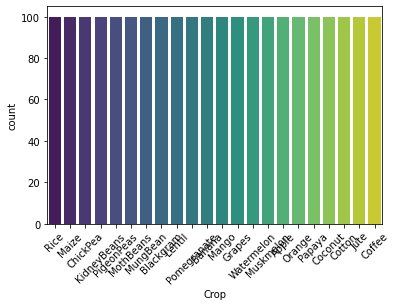

In [8]:
#visualizing the count of crops in visualization
sns.countplot(x = df['Crop'], palette = "viridis")
plt.xticks(rotation = 45)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'Rice'),
  Text(1, 0, 'Maize'),
  Text(2, 0, 'ChickPea'),
  Text(3, 0, 'KidneyBeans'),
  Text(4, 0, 'PigeonPeas'),
  Text(5, 0, 'MothBeans'),
  Text(6, 0, 'MungBean'),
  Text(7, 0, 'Blackgram'),
  Text(8, 0, 'Lentil'),
  Text(9, 0, 'Pomegranate'),
  Text(10, 0, 'Banana'),
  Text(11, 0, 'Mango'),
  Text(12, 0, 'Grapes'),
  Text(13, 0, 'Watermelon'),
  Text(14, 0, 'Muskmelon'),
  Text(15, 0, 'Apple'),
  Text(16, 0, 'Orange'),
  Text(17, 0, 'Papaya'),
  Text(18, 0, 'Coconut'),
  Text(19, 0, 'Cotton'),
  Text(20, 0, 'Jute'),
  Text(21, 0, 'Coffee')])

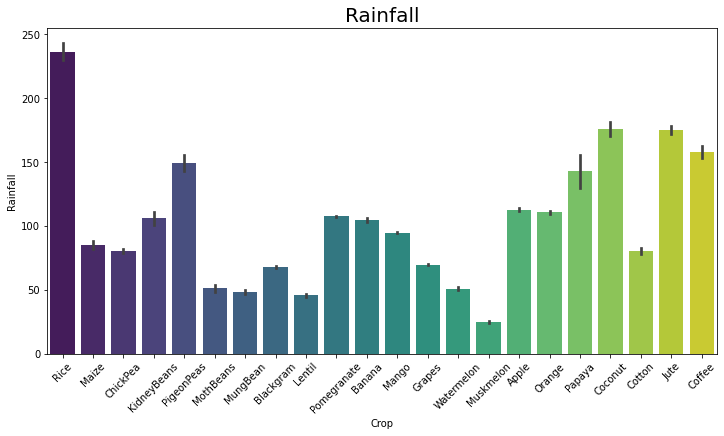

In [23]:
# exploring the rainfall vs crop type with the barplot
#to answer the questions like which crop needs better Rainfall
    plt.figure(figsize = (12,6))
    plt.title(col, fontsize = 20)
    sns.barplot(x = 'Crop', y = col, palette = 'viridis', data = df)
    plt.xticks(rotation = 45)

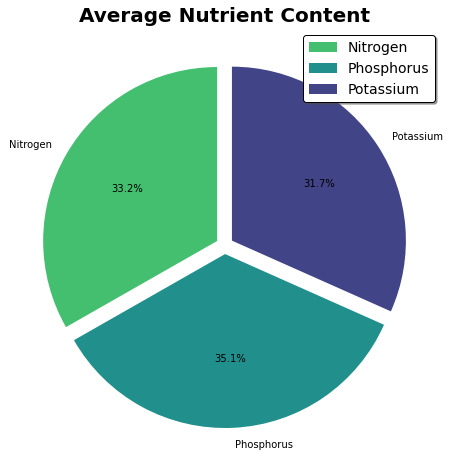

In [30]:
# we need to find out the average nutrision content for the crop
#used to test whether the soil is sutable for these kinds of crops mentioned in the data set
colors = cm.viridis_r([0.3, 0.5, 0.8])

fig, ax = plt.subplots(figsize = (8, 8))
nutrients = ['Nitrogen', 'Phosphorus', 'Potassium']
sizes = [df['Nitrogen'].mean(), df['Phosphorus'].mean(), df['Potassium'].mean()]

explode = [0.05, 0.05, 0.05] 
ax.pie(sizes, labels = nutrients, colors = colors, autopct = '%1.1f%%', startangle = 90, explode = explode)
ax.set_title('Average Nutrient Content', fontsize = 20, fontweight = 'bold')
ax.legend(fontsize = 14, loc = 'best', frameon = True, edgecolor = 'black', shadow = True)

plt.show()


In [34]:
#traing and spliting
X = df.drop('Crop', axis = 1)
y = df['Crop']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [35]:
rf = RandomForestClassifier(max_features = 'auto', min_samples_leaf = 1, 
                       min_samples_split = 2, random_state = 0)

rf.fit(xtrain, ytrain)
pred = rf.predict(xtest)

In [36]:
acuracia = accuracy_score(ytest, pred)
print('Accuracy: %f' % acuracia)

Accuracy: 0.997727


In [37]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        18
      Banana       1.00      1.00      1.00        18
   Blackgram       1.00      1.00      1.00        22
    ChickPea       1.00      1.00      1.00        23
     Coconut       1.00      1.00      1.00        15
      Coffee       1.00      1.00      1.00        17
      Cotton       1.00      1.00      1.00        16
      Grapes       1.00      1.00      1.00        18
        Jute       0.95      1.00      0.98        21
 KidneyBeans       1.00      1.00      1.00        20
      Lentil       1.00      1.00      1.00        17
       Maize       1.00      1.00      1.00        18
       Mango       1.00      1.00      1.00        21
   MothBeans       1.00      1.00      1.00        25
    MungBean       1.00      1.00      1.00        17
   Muskmelon       1.00      1.00      1.00        23
      Orange       1.00      1.00      1.00        23
      Papaya       1.00    